# Graphing Results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Obtain and clean data

In [4]:
# Read in data
deepseek_df = pd.read_csv("deepseek/deepseek_avg_metrics.csv")
phi_df = pd.read_csv("phi/phi_avg_metrics.csv")
llama_df = pd.read_csv("llama/llama_avg_metrics.csv")

# Rename llama columns to be consistent with other dfs
llama_df.columns = [
  "translation",
  "avg_bleu1_score",
  "avg_bleu2_score",
  "avg_bleu4_score",
  "avg_keyword_match",
  "avg_codebleu_score",
  "avg_inference_time",
  "num_samples"
]

### Create graphs

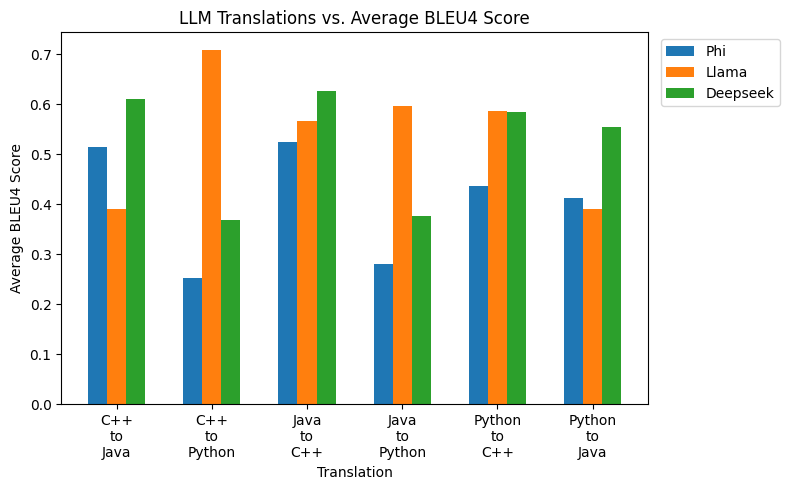

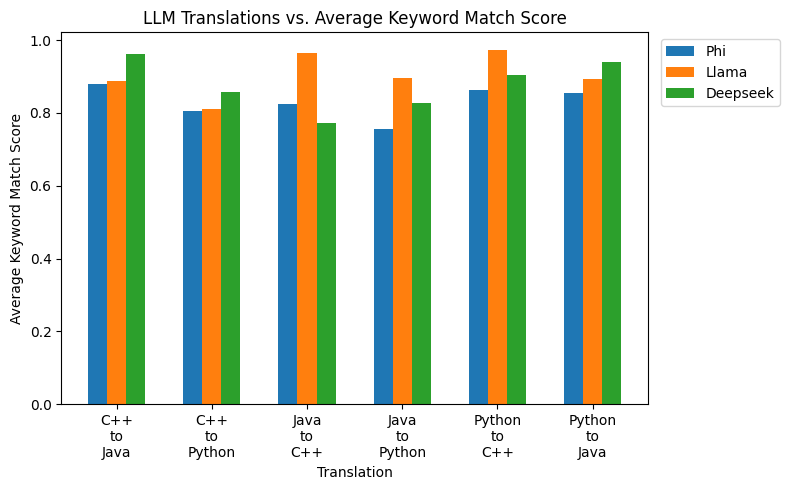

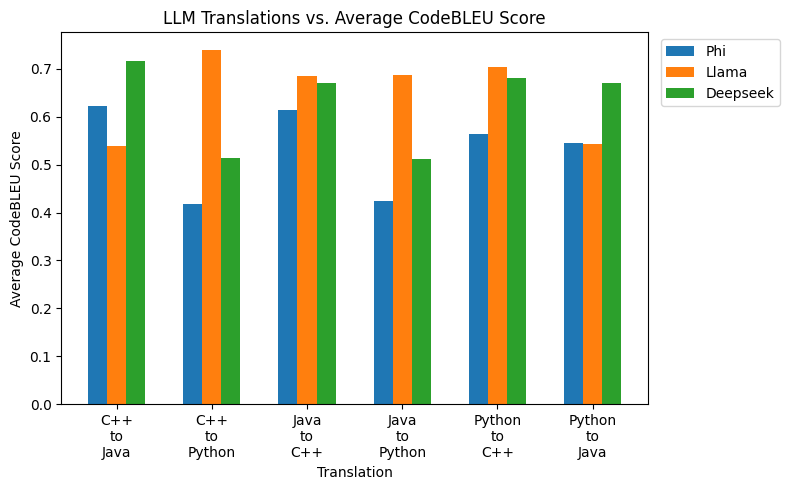

In [27]:
# Metrics to be graphed
metrics = [
  "avg_bleu4_score",
  "avg_keyword_match",
  "avg_codebleu_score"
]

# Metric labels
metric_labels = {
  "avg_bleu4_score": "Average BLEU4 Score",
  "avg_keyword_match": "Average Keyword Match Score",
  "avg_codebleu_score": "Average CodeBLEU Score"
}

# Translation labels
translation_labels = [
  "C++\nto\nJava",
  "C++\nto\nPython",
  "Java\nto\nC++",
  "Java\nto\nPython",
  "Python\nto\nC++",
  "Python\nto\nJava"
]

# Create the graph for each metric
for metric in metrics:
  deepseek_data = deepseek_df[metric]
  phi_data = phi_df[metric]
  llama_data = llama_df[metric]
  x = np.arange(len(translation_labels))
  width = 0.2

  # Create the bar plots
  plt.figure(figsize=(8, 5))
  plt.bar(x - width, phi_data, width, label='Phi')
  plt.bar(x, llama_data, width, label='Llama')
  plt.bar(x + width, deepseek_data, width, label='Deepseek')

  # Add labels, title, and legend
  plt.xlabel('Translation', )
  plt.ylabel(metric_labels[metric])
  plt.title(f'LLM Translations vs. {metric_labels[metric]}')
  plt.xticks(x, translation_labels)
  plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

  # Display the graph
  plt.tight_layout()
  plt.savefig(f"{metric}.png", bbox_inches="tight")
  plt.show()